# Telecom Churn - Case Study

### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from fancyimpute import KNN
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [2]:
# Importing the dataset
df_tel = pd.read_csv("telecom_churn_data.csv")
df_tel.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Checking dimension of dataset
df_tel.shape

(99999, 226)

## Check Null Values

In [4]:
# Check the null values
(df_tel.isnull().sum() * 100 / len(df_tel)).sort_values(ascending = False)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

In [5]:
# Imputing the values like count with 0
df_tel.count_rech_2g_6.fillna(0,inplace=True)
df_tel.count_rech_2g_7.fillna(0,inplace=True)
df_tel.count_rech_2g_8.fillna(0,inplace=True)
df_tel.count_rech_2g_9.fillna(0,inplace=True)
df_tel.count_rech_3g_6.fillna(0,inplace=True)
df_tel.count_rech_3g_7.fillna(0,inplace=True)
df_tel.count_rech_3g_8.fillna(0,inplace=True)
df_tel.count_rech_3g_9.fillna(0,inplace=True)

In [6]:
# Deleting the column with null value greater than 50 %
dcol = ["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9","total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9","date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_data_9","max_rech_data_6","max_rech_data_7","max_rech_data_8","max_rech_data_9","arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_3g_9","arpu_2g_6","arpu_2g_7","arpu_2g_8","arpu_2g_9","night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_6","fb_user_7","fb_user_8","fb_user_9","date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9"]

df_tel.drop(dcol , axis = 1 , inplace=True)
        

In [7]:
# Checking the columns with no variance in their values and drop such columns
for i in df_tel.columns:
    if df_tel[i].nunique() == 1:
        print("\nCol",i,"has no variance and contains", df_tel[i].nunique(),"unique value")
        print("Dropped column name: ",i)
        df_tel.drop(i,axis=1,inplace = True)

print("\nNew Dimension:",df_tel.shape)


Col circle_id has no variance and contains 1 unique value
Dropped column name:  circle_id

Col loc_og_t2o_mou has no variance and contains 1 unique value
Dropped column name:  loc_og_t2o_mou

Col std_og_t2o_mou has no variance and contains 1 unique value
Dropped column name:  std_og_t2o_mou

Col loc_ic_t2o_mou has no variance and contains 1 unique value
Dropped column name:  loc_ic_t2o_mou

Col last_date_of_month_6 has no variance and contains 1 unique value
Dropped column name:  last_date_of_month_6

Col last_date_of_month_7 has no variance and contains 1 unique value
Dropped column name:  last_date_of_month_7

Col last_date_of_month_8 has no variance and contains 1 unique value
Dropped column name:  last_date_of_month_8

Col last_date_of_month_9 has no variance and contains 1 unique value
Dropped column name:  last_date_of_month_9

Col std_og_t2c_mou_6 has no variance and contains 1 unique value
Dropped column name:  std_og_t2c_mou_6

Col std_og_t2c_mou_7 has no variance and contain

In [8]:
# Check the Null Values present in the dataset
(df_tel.isnull().sum() * 100 / len(df_tel)).sort_values(ascending = False)

loc_ic_t2t_mou_9      7.745077
roam_og_mou_9         7.745077
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_9      7.745077
loc_og_t2c_mou_9      7.745077
loc_og_mou_9          7.745077
std_og_t2t_mou_9      7.745077
std_og_t2m_mou_9      7.745077
ic_others_9           7.745077
isd_ic_mou_9          7.745077
loc_ic_t2m_mou_9      7.745077
spl_ic_mou_9          7.745077
std_og_t2f_mou_9      7.745077
std_ic_mou_9          7.745077
std_ic_t2f_mou_9      7.745077
loc_ic_t2f_mou_9      7.745077
std_ic_t2m_mou_9      7.745077
std_ic_t2t_mou_9      7.745077
std_og_mou_9          7.745077
loc_og_t2t_mou_9      7.745077
loc_ic_mou_9          7.745077
roam_ic_mou_9         7.745077
offnet_mou_9          7.745077
isd_og_mou_9          7.745077
spl_og_mou_9          7.745077
og_others_9           7.745077
onnet_mou_9           7.745077
roam_og_mou_8         5.378054
std_og_t2f_mou_8      5.378054
ic_others_8           5.378054
loc_ic_t2m_mou_8      5.378054
isd_ic_mou_8          5.378054
spl_ic_m

# Filter High Value Customers

In [9]:
# High-value customers : Those who have recharged with an amount more than or equal to 70th percentile of 
# the average recharge amount in the 6th and 7th month (the good phase)

# Average recharge done in the first two months(6th & 7th) - the good phase
# total amount spend would be the sum of total data recharge done & total call/sms recharges
df_avgtel = (df_tel['total_rech_num_6'] 
+ df_tel['total_rech_num_7'])/2

# taking 70 percentile of the calculated average amount
perc_70 = np.percentile(df_avgtel, 70.0)
print("70 percentile is : ", perc_70)

# fitler the given data set based on 70th percentile
df_newtel = df_tel[df_avgtel >= perc_70]



70 percentile is :  8.5


In [10]:
# Shape of the dataset after the filtering
df_newtel.shape

(30658, 174)

In [11]:
# Checking null values after HVC filtering
(df_newtel.isnull().sum() * 100 / len(df_newtel)).sort_values(ascending = False)

loc_ic_t2t_mou_9      6.340922
roam_ic_mou_9         6.340922
loc_og_t2f_mou_9      6.340922
std_og_t2f_mou_9      6.340922
std_og_mou_9          6.340922
loc_ic_t2f_mou_9      6.340922
loc_og_t2m_mou_9      6.340922
std_ic_t2f_mou_9      6.340922
loc_og_t2t_mou_9      6.340922
loc_og_mou_9          6.340922
loc_ic_t2m_mou_9      6.340922
std_ic_t2t_mou_9      6.340922
roam_og_mou_9         6.340922
isd_ic_mou_9          6.340922
std_ic_mou_9          6.340922
loc_og_t2c_mou_9      6.340922
loc_ic_mou_9          6.340922
spl_ic_mou_9          6.340922
offnet_mou_9          6.340922
std_ic_t2m_mou_9      6.340922
ic_others_9           6.340922
onnet_mou_9           6.340922
std_og_t2m_mou_9      6.340922
std_og_t2t_mou_9      6.340922
isd_og_mou_9          6.340922
spl_og_mou_9          6.340922
og_others_9           6.340922
std_og_t2t_mou_8      3.431405
std_og_t2f_mou_8      3.431405
isd_ic_mou_8          3.431405
loc_og_mou_8          3.431405
std_ic_t2f_mou_8      3.431405
std_ic_t

## Using Advanced Imputation(KNN) to fill in the Null values

In [12]:
# Adding the rows with null values in the temporary dataframe
df_temp = df_newtel[~df_newtel.isna().any(axis=1)]

In [13]:
## Using KNN for imputation of the null values
X_knn = pd.DataFrame(KNN(k=5).fit_transform(df_newtel[df_newtel.isna().any(axis=1)]))
X_knn.columns = df_newtel.columns
X_knn.head()

Imputing row 1/2384 with 81 missing, elapsed time: 10.401
Imputing row 101/2384 with 54 missing, elapsed time: 10.515
Imputing row 201/2384 with 27 missing, elapsed time: 10.643
Imputing row 301/2384 with 27 missing, elapsed time: 10.768
Imputing row 401/2384 with 54 missing, elapsed time: 10.886
Imputing row 501/2384 with 27 missing, elapsed time: 11.001
Imputing row 601/2384 with 81 missing, elapsed time: 11.115
Imputing row 701/2384 with 27 missing, elapsed time: 11.238
Imputing row 801/2384 with 54 missing, elapsed time: 11.361
Imputing row 901/2384 with 27 missing, elapsed time: 11.482
Imputing row 1001/2384 with 54 missing, elapsed time: 11.598
Imputing row 1101/2384 with 54 missing, elapsed time: 11.703
Imputing row 1201/2384 with 54 missing, elapsed time: 11.823
Imputing row 1301/2384 with 27 missing, elapsed time: 11.933
Imputing row 1401/2384 with 81 missing, elapsed time: 12.036
Imputing row 1501/2384 with 54 missing, elapsed time: 12.146
Imputing row 1601/2384 with 27 missi

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7.002389e+09,247.064,7.500,0.000,0.0,7.94,64.655183,14.070928,229.910832,146.91,117.912961,63.623089,27.270937,25.48,0.580161,1.666619,0.452663,154.86,2.20061,2.538735,2.967945,0.00,7.568562,8.822633,1.938629,0.00,43.9834,23.153078,21.985082,0.00,0.720118,0.761695,0.011456,0.00,0.02162,0.031061,0.000000,0.00,52.274261,32.739587,23.939324,0.00,57.085185,4.714042,225.510574,0.00,71.25729,37.296125,3.031570,0.0,0.0,0.000000,0.0,0.00,128.345811,42.010168,228.545661,0.0,0.0,0.0,0.000000,0.00,0.398876,1.232866,1.916638,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,9.805944,5.558664,5.286820,0.00,51.987048,23.506710,13.979614,0.00,0.278555,3.930786,29.144011,0.00,62.077291,33.000759,48.415395,0.00,0.969736,0.342375,6.616067,0.00,6.062807,9.591303,1.431982,0.00,0.0,0.0,0.000000,0.00,7.03306,9.933678,8.050273,0.00,0.00,0.00,0.0,0.00,0.096459,0.0,0.175718,0.0,0.0,0.000000,0.000000,0.00,0.014495,0.000000,0.000000,12.0,5.0,1.0,1.0,250.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,740.0,0.00,0.0,0.0,0.0
1,7.000462e+09,153.455,157.462,32.853,0.0,119.34,137.940000,16.510000,152.849811,36.16,252.590000,2.030000,339.308965,0.10,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.131951,0.08,0.190000,0.000000,3.431064,0.13,0.2500,0.000000,8.692731,0.00,0.000000,0.000000,0.358979,1.85,137.06000,0.000000,0.629504,0.21,0.440000,0.000000,12.487368,119.26,137

### The box plot below shows the comparision between the Original dataSet and KNN imputed data set
### In KNN Imputed Box plot the value varies between the 0-35 which means that the null values are imputed successfully

Text(0.5, 1.0, 'Original')

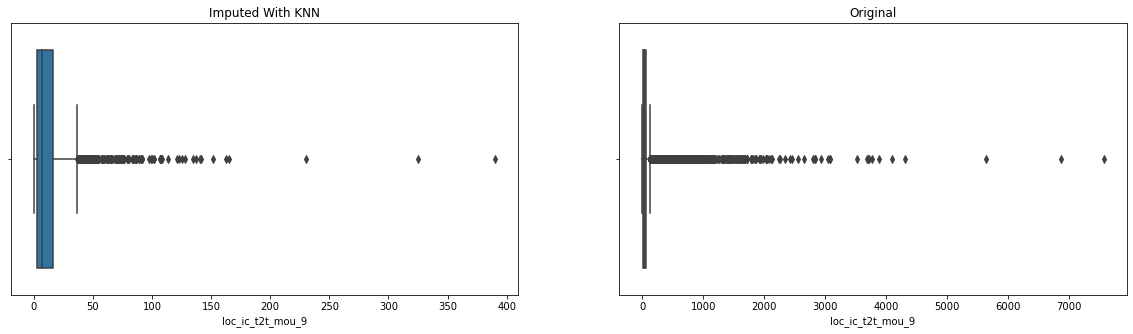

In [14]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(X_knn['loc_ic_t2t_mou_9'])
plt.title("Imputed With KNN")

plt.subplot(1,2,2)
sns.boxplot(df_newtel['loc_ic_t2t_mou_9'])
plt.title("Original")

In [15]:
# Adding the impted dataset into the original one 
df_cleantel = pd.concat([df_temp, X_knn])

In [16]:
# Checking the shape of the new dataset
df_cleantel.shape

(30658, 174)

In [17]:
# Checking null values in the new dataset
(df_cleantel.isnull().sum() * 100 / len(df_cleantel)).sort_values(ascending = False)

sep_vbc_3g            0.0
std_og_mou_7          0.0
spl_og_mou_7          0.0
spl_og_mou_6          0.0
isd_og_mou_9          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_6          0.0
spl_og_mou_9          0.0
std_og_t2f_mou_9      0.0
std_og_t2f_mou_8      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_6      0.0
std_og_t2m_mou_9      0.0
std_og_t2m_mou_8      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_6      0.0
spl_og_mou_8          0.0
og_others_6           0.0
std_og_t2t_mou_8      0.0
loc_ic_t2t_mou_9      0.0
loc_ic_t2f_mou_9      0.0
loc_ic_t2f_mou_8      0.0
loc_ic_t2f_mou_7      0.0
loc_ic_t2f_mou_6      0.0
loc_ic_t2m_mou_9      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2m_mou_7      0.0
loc_ic_t2m_mou_6      0.0
loc_ic_t2t_mou_8      0.0
og_others_7           0.0
loc_ic_t2t_mou_7      0.0
loc_ic_t2t_mou_6      0.0
total_og_mou_9        0.0
total_og_mou_8        0.0
total_og_mou

In [18]:
# Introducing a new column "churn" with values as 1 (churn) or 0 (non-churn)
# Calculating churn/non-churn based on the usage
df_cleantel['churn'] = np.where(df_cleantel[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
df_cleantel.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
3,7.001204e+09,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.0,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.0,0.00,0.0,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.0,0.0,0.0,0.0,29.23,16.63,296.11,236.21,0.0,0.0,0.0,0.0,10.96,0.00,18.09,43.29,0.00,0.0,0.0,0.00,223.23,135.31,352.21,362.54,62.08,19.98,8.04,41.73,113.96,64.51,20.28,52.86,57.43,27.09,19.84,65.59,233.48,111.59,48.18,160.19,43.48,66.44,0.00,129.84,1.33,38.56,4.94,13.98,1.18,0.0,0.0,0.0,45.99,105.01,4.94,143.83,280.08,216.61,53.13,305.38,0.59,0.0,0.0,0.55,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.8,10.0,11.0,18.0,14.0,230.0,310.0,601.0,410.0,60.0,50.0,50.0,50.0,30.0,50.0,50.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2491.0,0.00,0.00,0.00,0.0,0
6,7.001051e+09,429.023,190.704,255.114,114.751,71.03,45.03,76.66,15.23,262.73,49.24,92.08,50.33,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,71.03,45.03,76.14,15.23,252.23,48.71,80.63,50.33,10.38,0.00,0.00,0.00,0.11,0.0,0.00,0.0,333.64,93.74,156.78,65.56,0.00,0.00,0.51,0.00,0.00,0.53,11.45,0.00,0.0,0.0,0.0,0.0,0.00,0.53,11.96,0.00,0.0,0.0,0.0,0.0,0.11,0.53,0.00,0.00,0.00,0.0,0.0,0.35,333.76,94.81,168.74,65.91,1857.99,1427.04,1896.43,2334.88,248.64,336.96,265.28,231.41,20.24,22.69,2.51,6.19,2126.89,1786.71,2164.23,2572.49,0.00,0.00,0.00,0.00,1.3

In [19]:
# Finding the percentage between churn and not churn
df_cleantel['churn'].value_counts()/len(df_cleantel)*100

#observation : 90% of the customers do not churn, this might be a case of class imbalance, we will treat it later

0    90.416857
1     9.583143
Name: churn, dtype: float64

In [20]:
# Deleting 9th month columns because we would predict churn/non-churn later based on data from the 1st 3 months
cols_to_drop = [col for col in df_cleantel.columns if '_9' in col]
print(cols_to_drop)

df_cleantel.drop(cols_to_drop, axis=1, inplace=True)

df_cleantel.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'count_rech_2g_9', 'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


(30658, 133)

In [21]:
# Function to plot historgram for some sample columns
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [22]:
# Function to plot scatter matrix
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


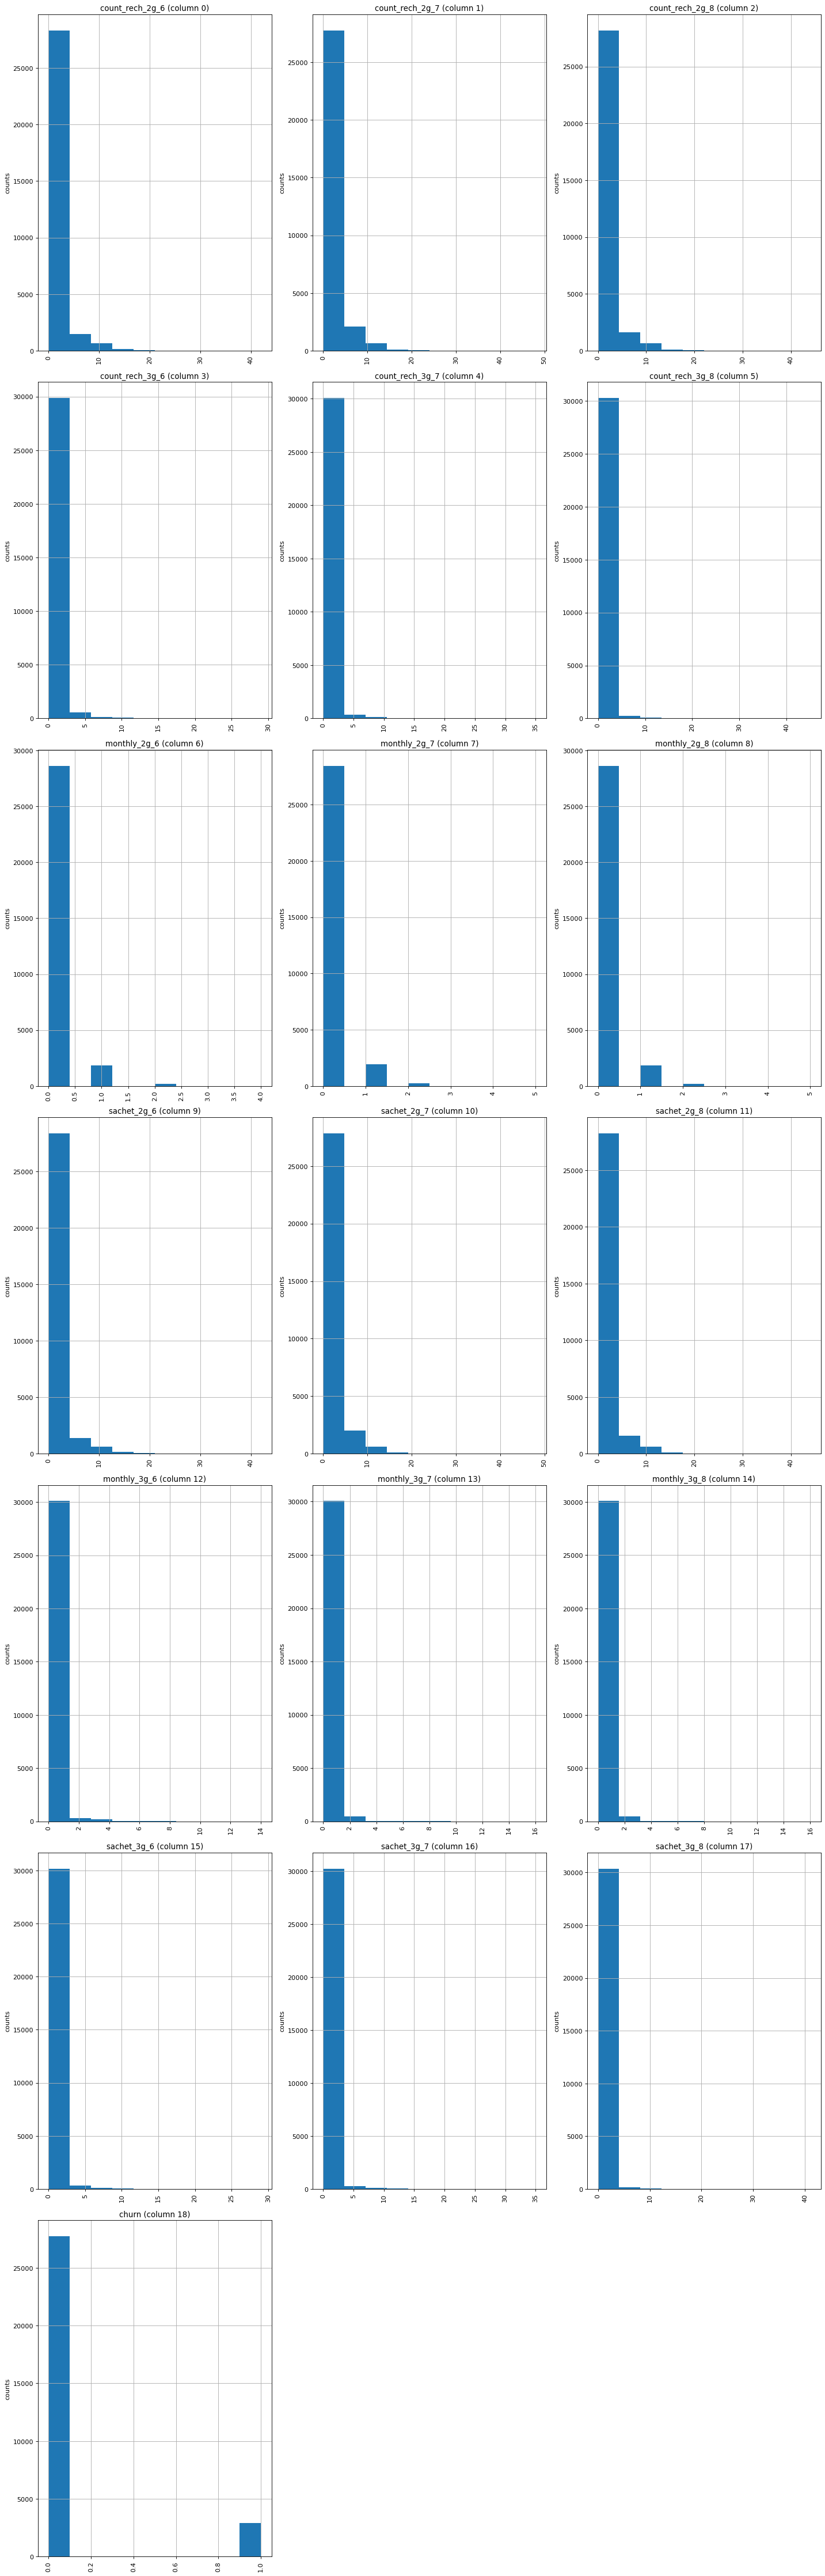

In [23]:
# calling the function to plot the graphs
plotPerColumnDistribution(df_cleantel, 20, 3)

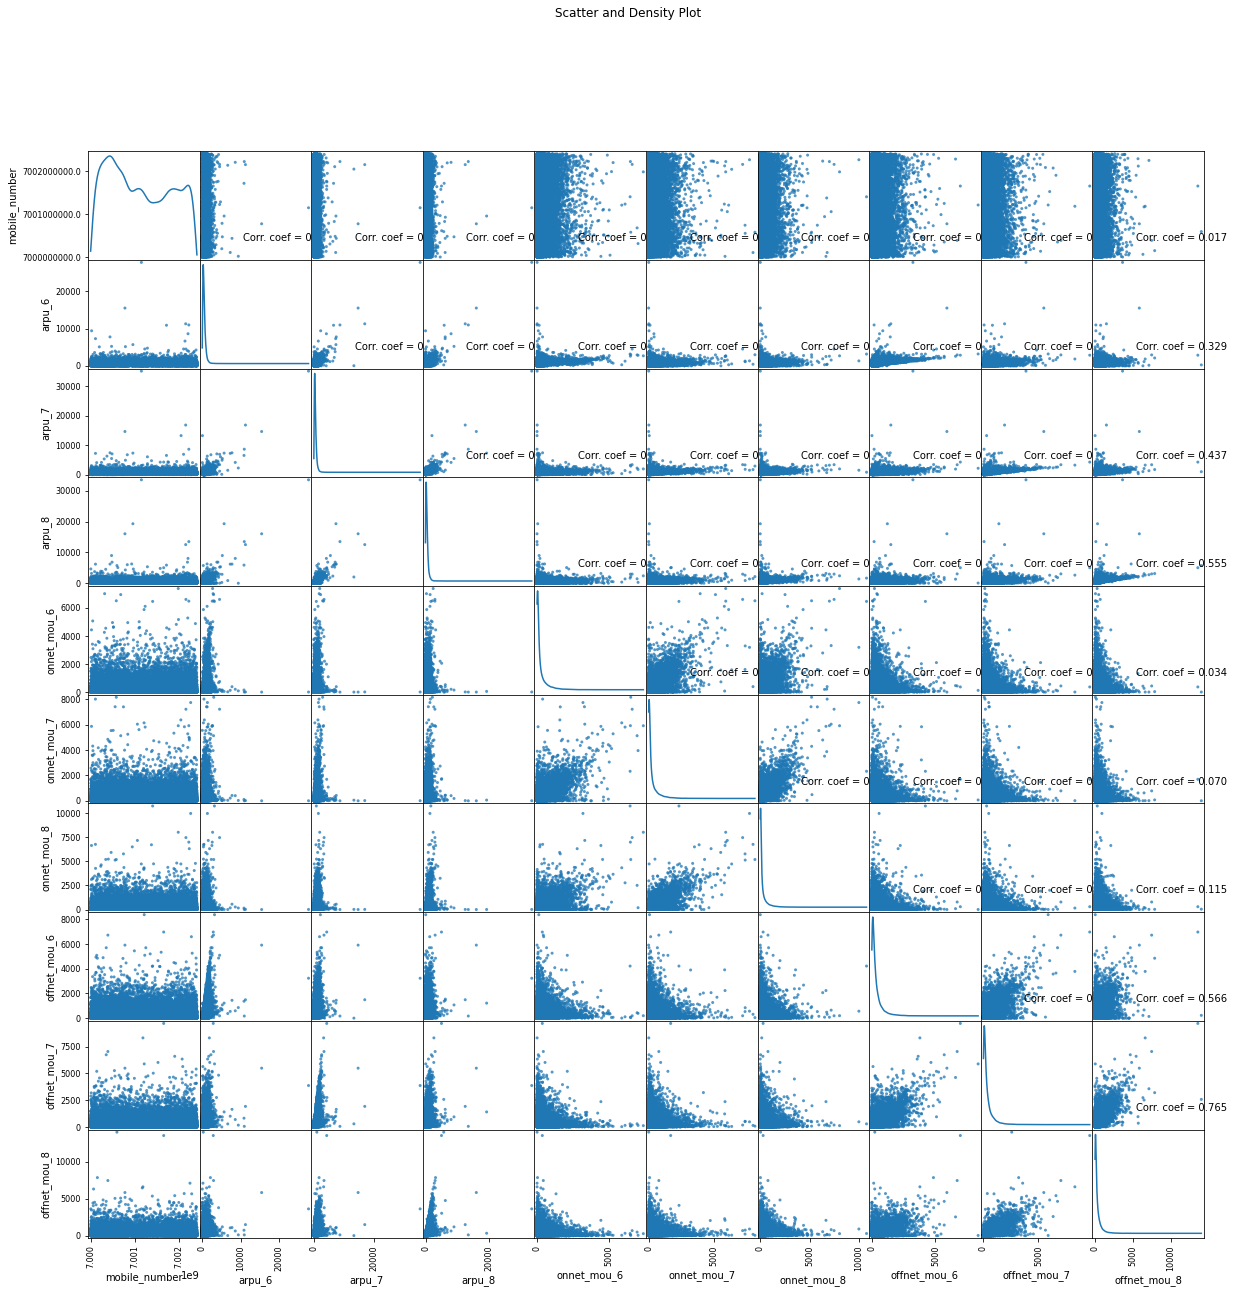

In [24]:
# Calling the function to plot the scatter matrix
plotScatterMatrix(df_cleantel, 20, 10)

# Deriving some new feautres from the existing columns

In [25]:
# create a new colulmn, which contains average of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
cols = df_cleantel.filter(regex='_6|_7').columns.str[:-2]
cols.unique()

# checking the shape befor the average
print (df_cleantel.shape)

# lets take the average now
for idx, col in enumerate(cols.unique()):
    avg_col = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_cleantel[avg_col] = (df_cleantel[col_6]  + df_cleantel[col_7])/ 2



(30658, 133)


In [26]:
# Deleting the un-necessary columns
print ("dimension of the updated dataset after creating dervied features:",df_cleantel.shape)
drop_col = df_cleantel.filter(regex='_6|_7').columns
df_cleantel.drop(drop_col, axis=1, inplace=True)

print("dimension of the dataset after dropping un-necessary columns:",df_cleantel.shape)

dimension of the updated dataset after creating dervied features: (30658, 175)
dimension of the dataset after dropping un-necessary columns: (30658, 91)


In [27]:
# lets now conevrt AON(Age on network - number of days the customer is using the operator T network) in months
df_cleantel['aon_mon'] = df_cleantel['aon']/30
df_cleantel.drop('aon', axis=1, inplace=True)
df_cleantel['aon_mon'].head()

3     83.033333
6     55.766667
8     10.500000
17    22.233333
21    24.000000
Name: aon_mon, dtype: float64

### From the below graphs we can see that:-
### - More customers are having connections for 2G service in comparision to 3G 
### - In 3G services, customers have done less number of recharges

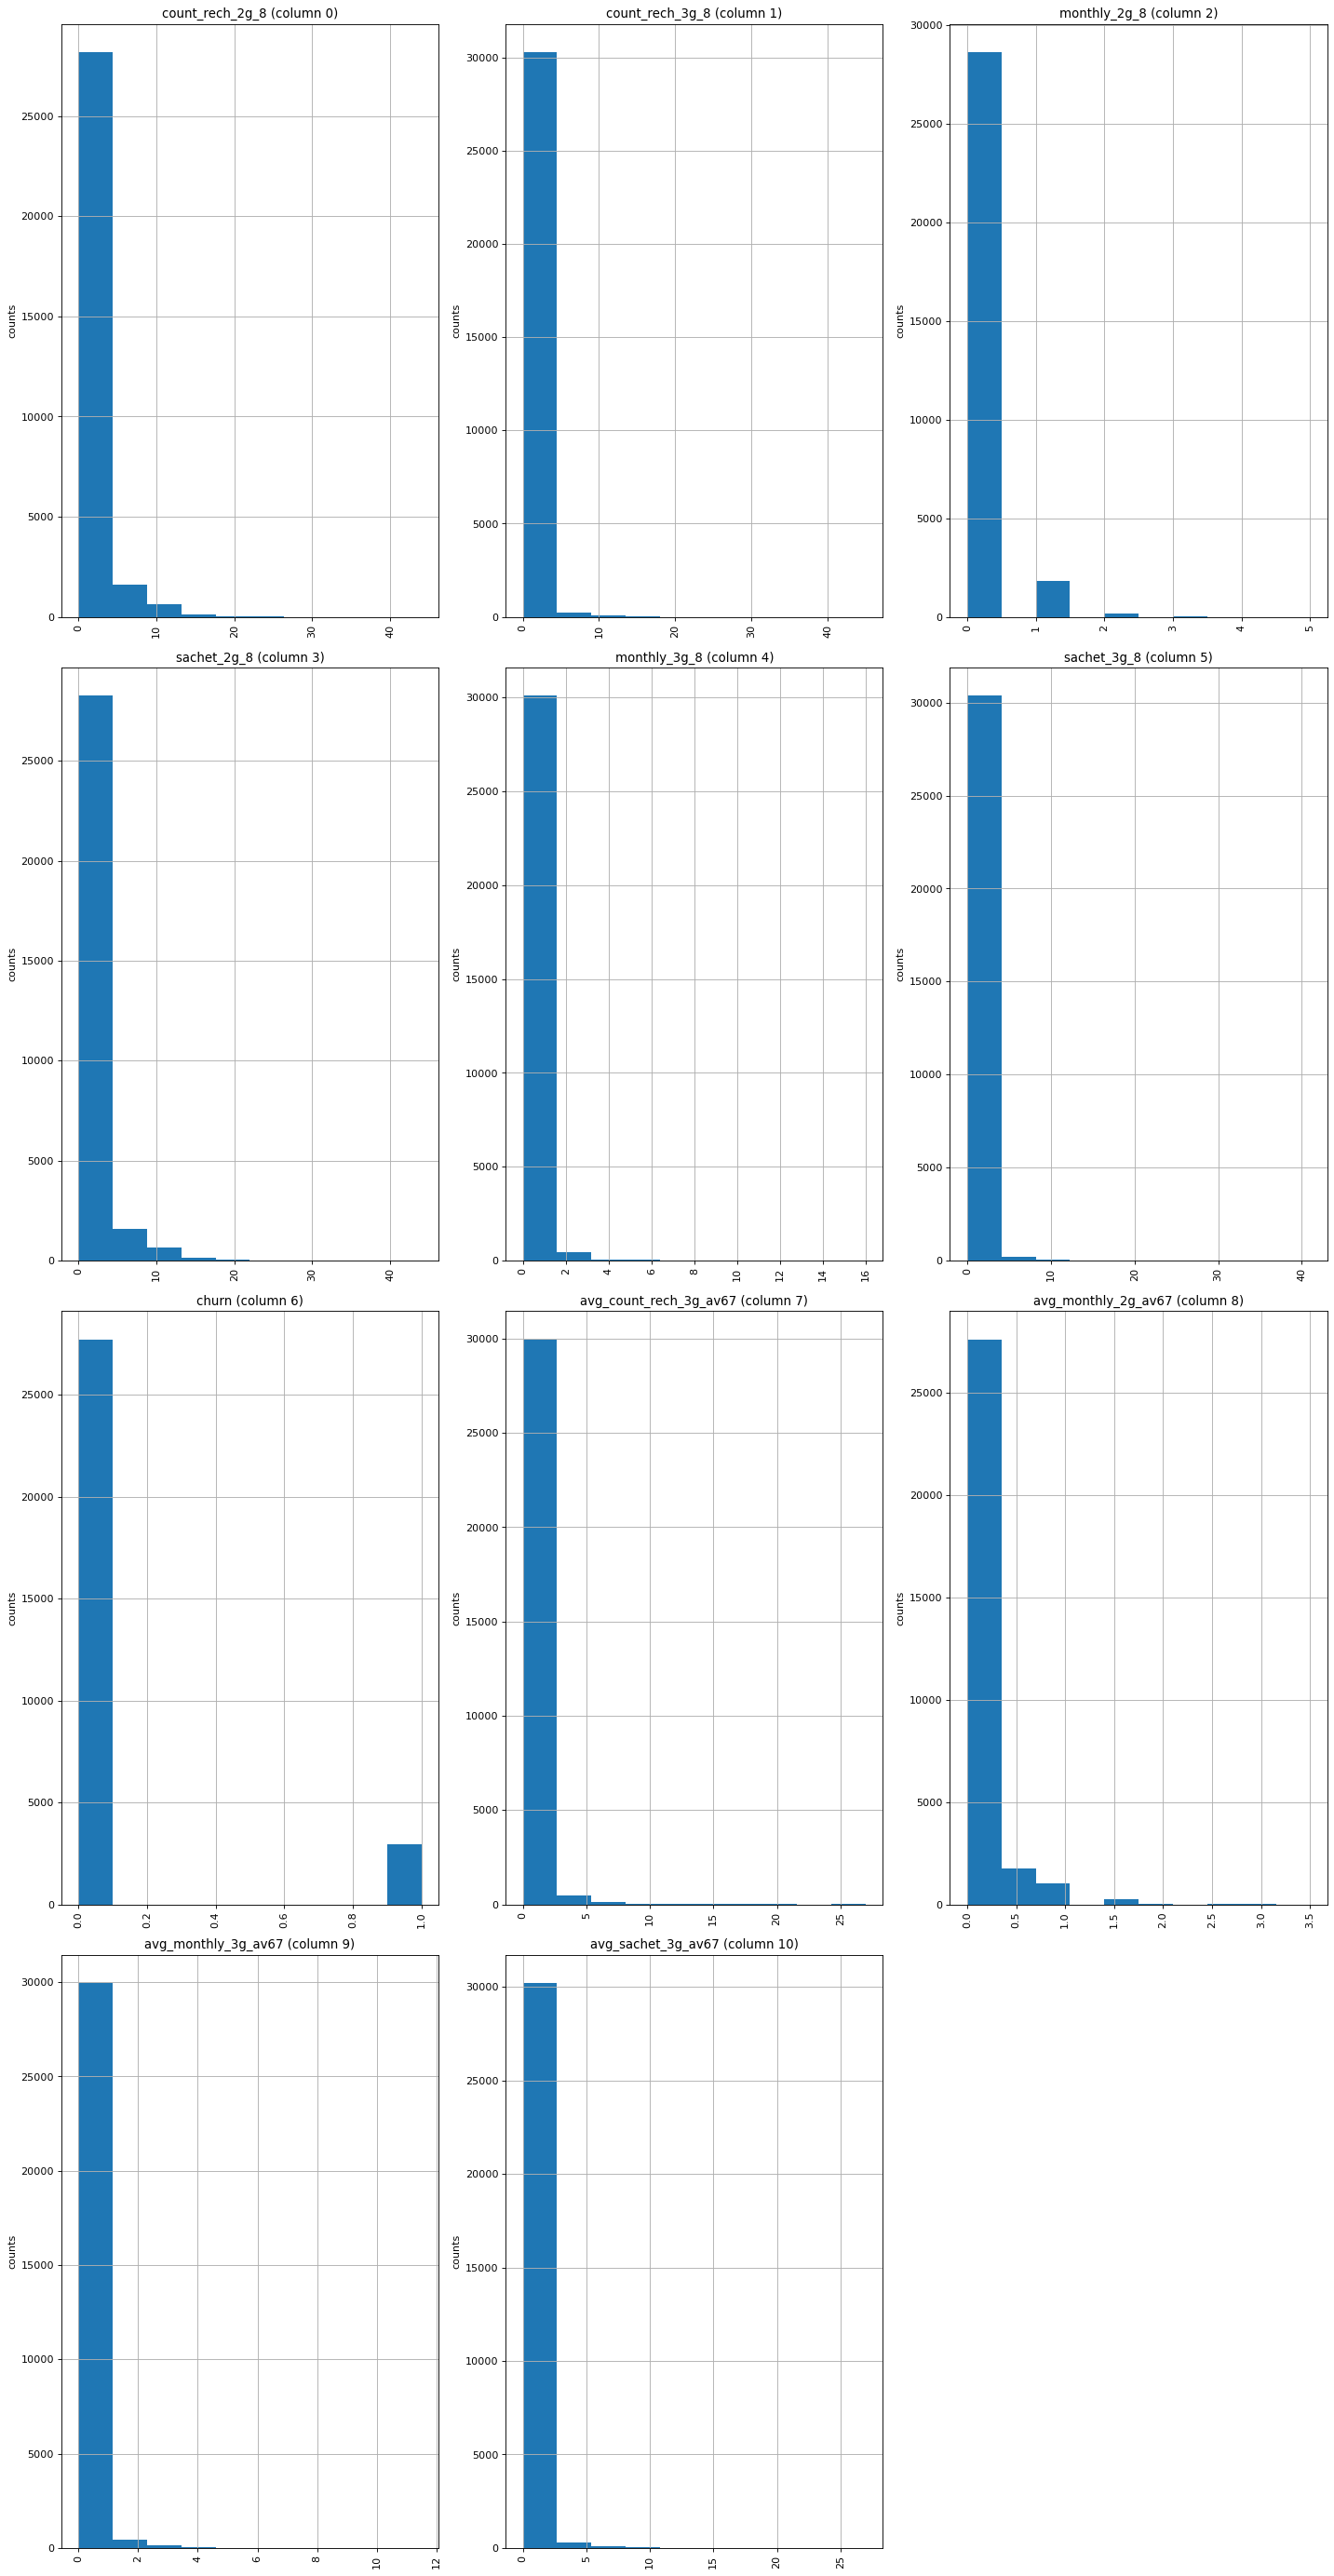

In [28]:
# Plotting graphs for updated dataset
plotPerColumnDistribution(df_cleantel, 20, 3)

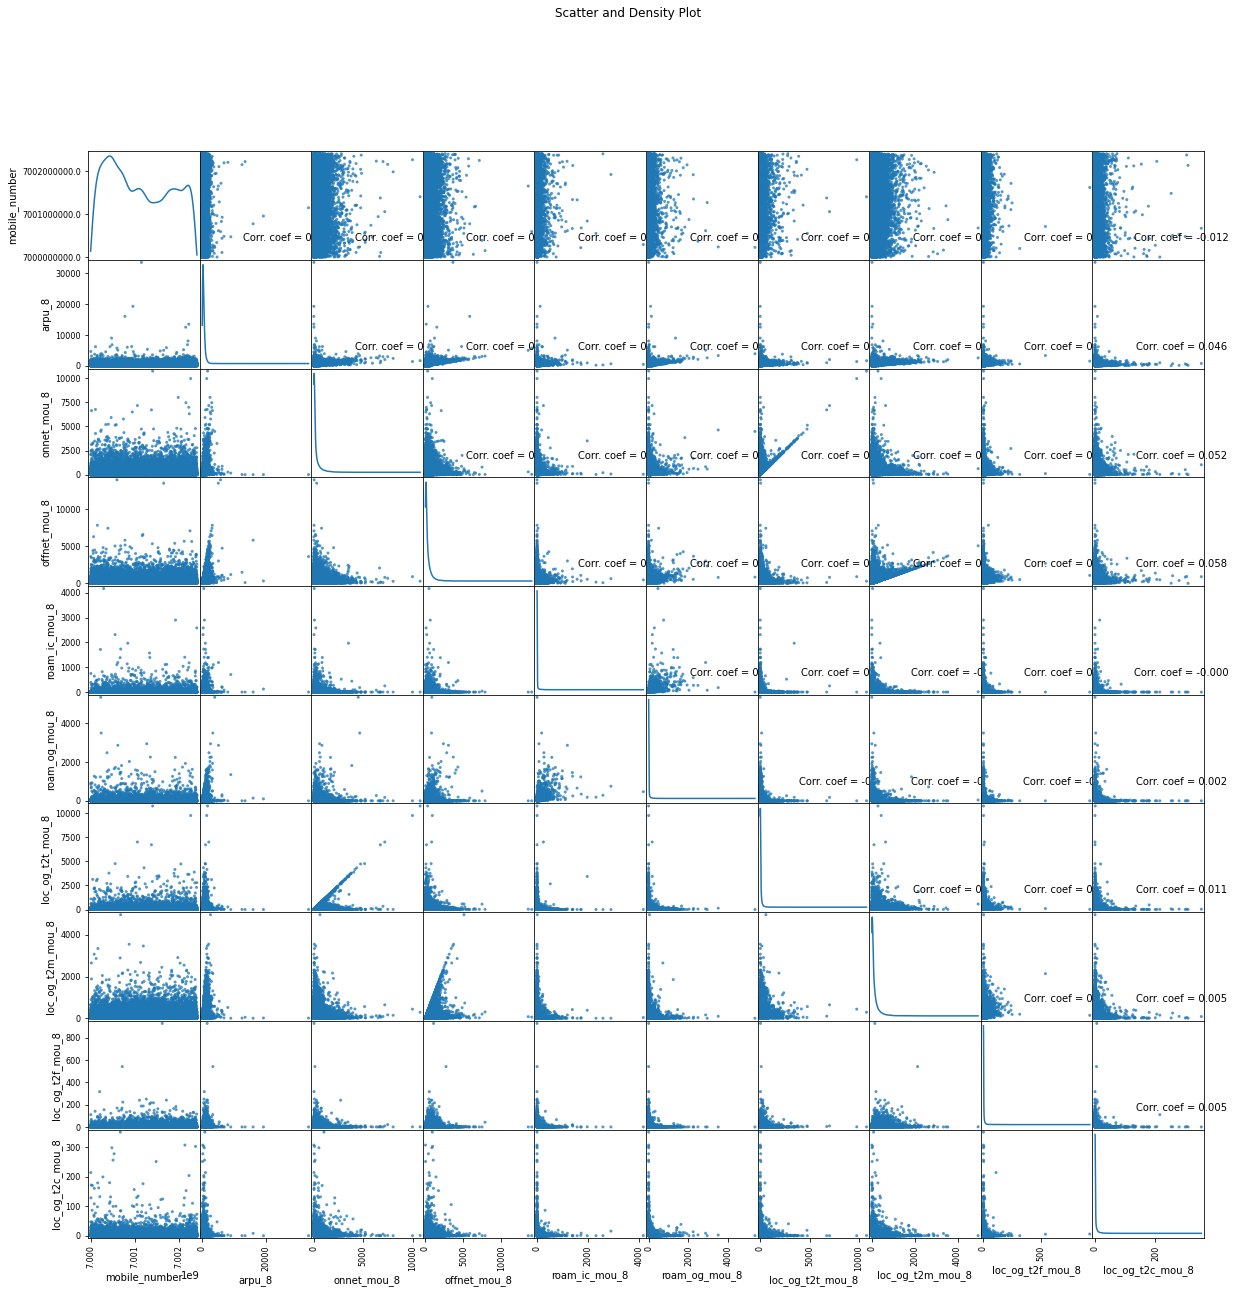

In [29]:
plotScatterMatrix(df_cleantel, 20, 10)

### below graph simply shows the tenure of the customers

Text(0.5, 1.0, 'Tenure Graph')

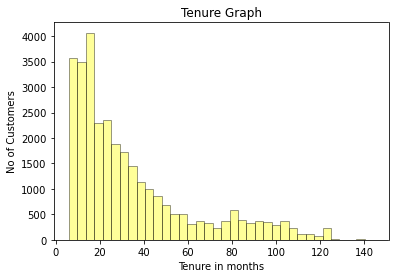

In [30]:
ax = sns.distplot(df_cleantel['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'yellow', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')


In [31]:
# Creating bins for the months
yr_cat = [0, 6, 12, 24, 60, 100]
yr_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df_cleantel['tenure_rng'] = pd.cut(df_cleantel['aon_mon'], yr_cat, labels=yr_label)
df_cleantel['tenure_rng'].head()

3     5 Yrs and above
6             2-5 Yrs
8         6-12 Months
17            1-2 Yrs
21            1-2 Yrs
Name: tenure_rng, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

### 1. Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn. 
### 2. Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

<AxesSubplot:>

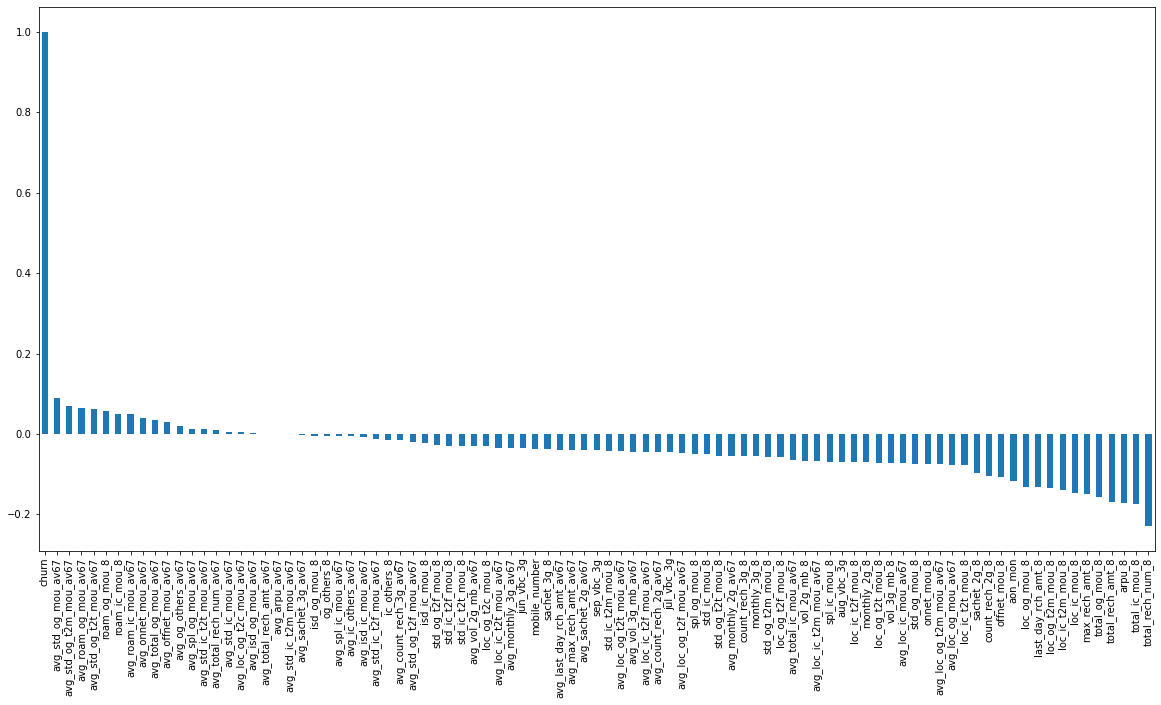

In [32]:
# lets check correlation of churn with other columns
plt.figure(figsize=(20,10))
df_cleantel.corr()['churn'].sort_values(ascending = False).plot(kind='bar')



### From the below scatter plot we can see that in the 8th month maximum number of re-charges were done

<AxesSubplot:xlabel='total_rech_num_8', ylabel='arpu_8'>

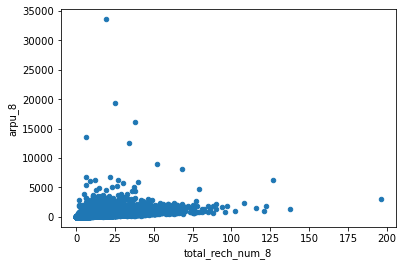

In [33]:
# scatter plot between total recharge and avg revenue for the 8th month
df_cleantel[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')

### Below graph shows that generally revenue is below 5k

<AxesSubplot:xlabel='aon_mon', ylabel='avg_arpu_av67'>

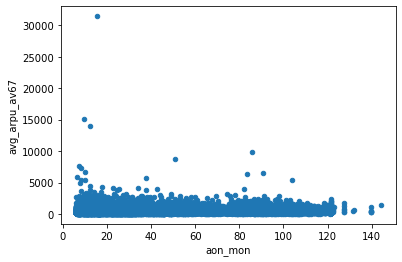

In [34]:
# plot between tenure and revenue
df_cleantel[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon',
                                                              y='avg_arpu_av67')

# Churn Vs other important features

### from the below plot , its clear tenured customers do no churn and they keep availing telecom services

<AxesSubplot:xlabel='churn', ylabel='aon_mon'>

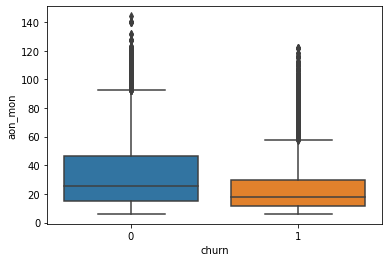

In [35]:
sns.boxplot(x = df_cleantel.churn, y = df_cleantel.aon_mon)

Text(0.5, 1.0, 'Churn Vs Base Cost')

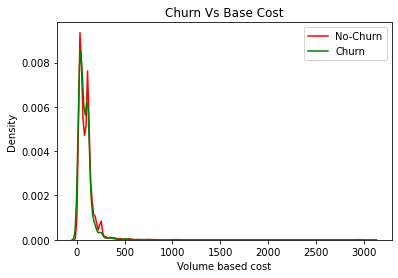

In [36]:
# churn Vs Base Cost
ax = sns.kdeplot(df_cleantel.avg_max_rech_amt_av67[(df_cleantel["churn"] == 0)],
                color="Red")
ax = sns.kdeplot(df_cleantel.avg_max_rech_amt_av67[(df_cleantel["churn"] == 1)],
                ax =ax, color="Green")
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

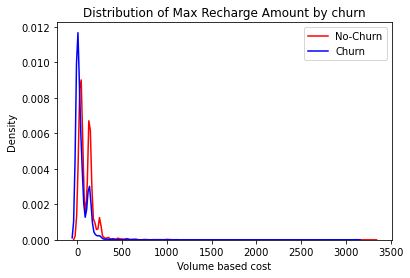

In [37]:
# churn vs max recharge amount
ax = sns.kdeplot(df_cleantel.max_rech_amt_8[(df_cleantel["churn"] == 0)],
                color="Red")
ax = sns.kdeplot(df_cleantel.max_rech_amt_8[(df_cleantel["churn"] == 1)],
                ax =ax, color="Blue")
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

In [38]:
# we will create a new dataset for model building
df = df_cleantel[:].copy()

# lets drop tenure range because it is highly correlated with AON MONTH column
df.drop('tenure_rng', axis=1, inplace=True)
df.drop('mobile_number', axis=1, inplace=True)
df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,count_rech_2g_8,count_rech_3g_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_total_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_count_rech_2g_av67,avg_count_rech_3g_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,aon_mon
3,508.054,310.98,71.68,44.38,39.04,10.61,22.46,4.91,0.00,37.99,289.58,6.53,0.0,296.11,0.0,18.09,0.0,352.21,8.04,20.28,19.84,48.18,0.00,4.94,0.0,4.94,53.13,0.0,0.0,0.00,18.0,601.0,50.0,50.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,236.2200,77.150,116.160,27.43,14.045,54.245,95.32,1.280,0.000,150.855,20.560,2.360,0.0,22.930,0.0,5.48,0.000,179.270,41.030,89.235,42.260,172.535,54.960,19.945,0.59,75.500,248.345,0.295,0.0,0.000,10.5,270.0,55.0,40.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,83.033333
6,255.114,76.66,92.08,0.00,0.00,76.14,80.63,0.00,0.00,156.78,0.51,11.45,0.0,11.96,0.0,0.00,0.0,168.74,1896.43,265.28,2.51,2164.23,0.00,2.60,0.0,2.60,2167.11,0.0,0.0,0.28,11.0,294.0,50.0,10.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,309.8635,58.030,155.985,0.00,0.000,58.030,150.47,5.190,0.055,213.690,0.000,0.265,0.0,0.265,0.0,0.32,0.000,214.285,1642.515,292.800,21.465,1956.800,0.000,1.075,0.00,1.075,1958.235,0.000,0.0,0.345,12.5,360.5,63.5,30.5,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,55.766667
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.0,98.28,0.0,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.0,0.75,16.54,0.0,0.0,0.00,14.0,120.0,30.0,10.0,3.0,0.0,0.03,11.94,0.0,3.0,0.0,0.0,21.03,910.65,122.16,0.0,0,435.4720,382.360,87.645,0.00,0.000,257.360,75.77,0.000,0.000,333.135,124.995,11.865,0.0,136.870,0.0,0.00,0.000,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.00,13.545,66.175,0.000,0.0,0.000,20.0,519.0,122.0,25.0,1.0,0.0,178.0,375.475,0.5,0.5,0.0,0.0,10.500000
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,4.0,30.0,30.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,354.4940,597.595,30.820,2.38,4.230,19.495,29.27,0.000,0.000,48.770,573.860,0.775,0.0,574.635,0.0,1.29,0.465,625.170,17.270,24.860,0.000,42.135,4.315,0.640,0.00,4.955,47.095,0.000,0.0,0.000,10.5,408.0,55.0,15.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,22.233333
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.0,938.79,0.0,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.0,101.93,261.04,0.0,0.0,0.00,27.0,718.0,50.0,50.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,556.1030,117.260,827.305,0.00,0.000,5.320,89.87,0.375,0.000,95.565,111.935,737.050,0.0,848.990,0.0,0.00,0.000,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.00,62.98

# Create X & y dataset for model building

In [39]:
# X will not have "churn" and y will only have "churn"
X = df.drop(['churn'], axis=1)
y = df['churn']

df.drop('churn', axis=1, inplace=True)


In [40]:
# apply scaling on the dataset
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [41]:
# split the dateset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=78)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21460, 89)
Dimension of X_test: (9198, 89)


In [42]:
# The dataset is skewed, balancing the dataset
sm = SMOTE(random_state=78)
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [43]:
print("Shape of X train :", X_tr.shape)
print("Shape of y train :", y_tr.shape)

print("Imbalance in Training dataset:",(y_tr != 0).sum()/(y_tr == 0).sum())

Shape of X train : (38778, 89)
Shape of y train : (38778,)
Imbalance in Training dataset: 1.0


In [44]:
y_tr.value_counts()/len(y_tr)*100

1    50.0
0    50.0
Name: churn, dtype: float64

In [45]:
# using RFE for feature reduction
lr = LogisticRegression()

# RFE select 25 most imp features for us
rfe = RFE(lr, 25)   
rfe = rfe.fit(X_tr, y_tr)

In [46]:
rfe_features = list(df.columns[rfe.support_])
print("25 most important features selected by RFE ", rfe_features)

25 most important features selected by RFE  ['arpu_8', 'onnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_amt_8', 'sep_vbc_3g', 'avg_arpu_av67', 'avg_offnet_mou_av67', 'avg_loc_og_mou_av67', 'avg_std_og_t2t_mou_av67', 'avg_std_og_t2m_mou_av67', 'avg_std_og_mou_av67', 'avg_total_og_mou_av67']


In [47]:
# Adding the rfe selected column into dataframe
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [48]:
#  Logisctic Regression model on RFE seleted columns
lr = LogisticRegression(random_state=78)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=78)

In [49]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
# Checking the accurancy of the model
print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))

[[6932 1399]
 [ 145  722]]
Accuracy on the test dataset: 0.8321374211785171


In [50]:
# classification report on the test dataset
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8331
           1       0.34      0.83      0.48       867

    accuracy                           0.83      9198
   macro avg       0.66      0.83      0.69      9198
weighted avg       0.92      0.83      0.86      9198



Conclusion from the above model:

Model Accuracy is approx 79%
Confusion matix shows high false positive rate, which is not good, lets try PCA now.

# PCA

In [51]:
# PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to correct class imbalance
sm = SMOTE(random_state=78)
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)


(38770, 89)
(38770,)


In [52]:
# apply PCA on train data
pca = PCA(random_state=78)
pca.fit(X_tr)

PCA(random_state=78)

In [53]:
# Component of PCA
pca.components_

array([[ 2.23179351e-01,  1.54490387e-01,  1.80774809e-01, ...,
         7.16090638e-02,  9.40678225e-03,  5.59668593e-02],
       [-2.13102087e-02,  9.82754346e-02,  4.98666562e-02, ...,
        -9.52847600e-02, -8.01977201e-02, -9.24043661e-02],
       [ 7.88549492e-02, -3.32474120e-02, -2.21783501e-02, ...,
         1.65354311e-01,  2.15277783e-01, -2.76469212e-02],
       ...,
       [ 5.81170545e-16,  3.64611296e-15,  4.68675135e-15, ...,
        -1.13820637e-01, -2.42749113e-01, -7.80932017e-17],
       [-0.00000000e+00, -2.97221081e-15, -2.62886375e-15, ...,
         2.32246599e-01,  4.95320160e-01,  5.25725625e-17],
       [ 0.00000000e+00,  2.67142023e-15,  4.04977223e-15, ...,
        -2.55268876e-02, -5.44420547e-02, -7.77104113e-17]])

In [54]:
# PCA variance ratio
pca.explained_variance_ratio_

array([1.38296697e-01, 9.06075985e-02, 6.16773126e-02, 5.60999698e-02,
       4.41172219e-02, 4.31302626e-02, 4.01802588e-02, 3.39370973e-02,
       3.09338538e-02, 2.55086441e-02, 2.47659747e-02, 2.37109857e-02,
       2.01377692e-02, 1.81310840e-02, 1.78541602e-02, 1.66363320e-02,
       1.57294465e-02, 1.47693624e-02, 1.41745495e-02, 1.33565989e-02,
       1.27158344e-02, 1.25682011e-02, 1.18470233e-02, 1.10315462e-02,
       1.03096451e-02, 1.01496817e-02, 9.89121153e-03, 9.69353395e-03,
       9.17160155e-03, 9.01719599e-03, 8.76235717e-03, 8.16357548e-03,
       7.99641499e-03, 7.62938612e-03, 6.94561415e-03, 6.61677744e-03,
       6.52854033e-03, 6.39163524e-03, 5.92968570e-03, 5.73820912e-03,
       5.62136963e-03, 4.99872182e-03, 4.61876435e-03, 4.53871490e-03,
       4.46180773e-03, 4.17381609e-03, 3.70944453e-03, 3.59638194e-03,
       3.39767786e-03, 3.25654820e-03, 3.04750721e-03, 2.97174195e-03,
       2.91809594e-03, 2.78369598e-03, 2.74608347e-03, 2.62999689e-03,
      

In [55]:
# Cumulative Sum
var_cumu = np.cumsum(pca.explained_variance_ratio_)

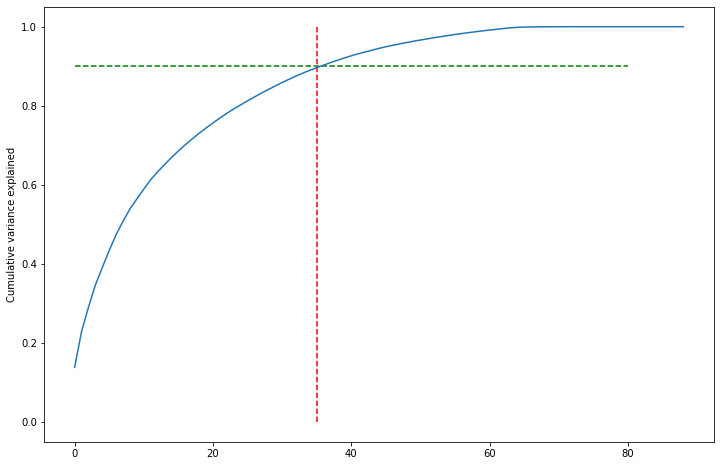

In [56]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=35, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [57]:
# PCA with 35 components
pca = PCA(n_components=35)

df_pca_train = pca.fit_transform(X_tr)
print(df_pca_train.shape)

df_pca_test = pca.transform(X_test)
print(df_pca_test.shape)

(38770, 35)
(9198, 35)


In [58]:
# Model using the selected variables
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(df_pca_train, y_tr)

# Predicted probabilities
y_pred = lr_pca.predict(df_pca_test)

# Converting y_pred to a dataframe
df_y_pred = pd.DataFrame(y_pred)

print("Accuracy with 35 PCAs: ",accuracy_score(y_test,y_pred))

Accuracy with 35 PCAs:  0.8107197216786258


In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[6743 1592]
 [ 149  714]]


Conclusions from the above model:

Model has 80% Accuracy
35 features can explain 90% variance in the dataset
most imp features: arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8

# Decision Tree

In [60]:
# creating a decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=78)

# apply SMOTE to tackle class imbalance
sm = SMOTE(random_state=78)
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(38778, 89)
(38778,)


In [61]:
# feature selection 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
svc_model = SelectFromModel(svc, prefit=True)
X_dt = svc_model.transform(X_tr)
idx = svc_model.get_support(indices=True)

print(X_dt.shape)
print(idx)

(38778, 31)
[ 4  8  9 15 17 20 26 27 30 31 32 33 34 36 37 38 40 45 46 49 50 58 59 67
 68 72 73 76 78 84 88]


In [62]:
# feature vector for decision tree
features = list(df.columns[idx])
print("Features: ", features)

Features:  ['roam_og_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'count_rech_2g_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'avg_arpu_av67', 'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67', 'avg_std_og_t2f_mou_av67', 'avg_std_og_mou_av67', 'avg_loc_ic_mou_av67', 'avg_std_ic_t2t_mou_av67', 'avg_total_ic_mou_av67', 'avg_spl_ic_mou_av67', 'avg_total_rech_num_av67', 'avg_max_rech_amt_av67', 'avg_monthly_2g_av67', 'aon_mon']


In [63]:
# creating a decision tree with the default hyper parameters except max depth to make the tree readable
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_dt, y_tr)

DecisionTreeClassifier(max_depth=5)

In [64]:
# classification reort of the model built

# Model predictions
X_test = pd.DataFrame(data=X_test).iloc[:, idx]
y_pred = dt.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8331
           1       0.46      0.79      0.58       867

    accuracy                           0.89      9198
   macro avg       0.72      0.85      0.76      9198
weighted avg       0.93      0.89      0.91      9198



In [65]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))
# accuracy of the decision tree
print('Decision Tree - Accuracy :',accuracy_score(y_test,y_pred))

[[7546  785]
 [ 186  681]]
Decision Tree - Accuracy : 0.8944335725157643


# Tunning hyperparameters

In [66]:
# Create the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_dt, y_tr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   52.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [67]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)


Best Accuracy 0.903708825163622


In [68]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=50)


In [69]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_entropy.fit(X_dt, y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=25,
                       min_samples_split=50, random_state=100)

In [70]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_entropy.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.8914981517721243


### Obsrvation from the above Decision Tree model
### 1. 85% accuracy on the test dataset
### 2. lots of false positives in the confusion matrix

# Random Forest

In [71]:
# Creating Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_dt, y_tr)

# Make predictions
prediction_test = rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9292237442922374


In [72]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8331
           1       0.61      0.71      0.66       867

    accuracy                           0.93      9198
   macro avg       0.79      0.83      0.81      9198
weighted avg       0.94      0.93      0.93      9198



In [73]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[7928  403]
 [ 248  619]]


In [74]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [500,700], 
    'max_features': [20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [75]:
# fit the grid search with the data
grid_search.fit(X_dt, y_tr)
# optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 94.5min finished


Accuracy is 0.8965392748465625 using {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 700}


In [86]:
# Splitting into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=700 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =78,
                                  max_features = 20,
                                  
                                 )
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

In [87]:
# evaluation metrics
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5577
           1       0.76      0.52      0.62       555

    accuracy                           0.94      6132
   macro avg       0.86      0.75      0.79      6132
weighted avg       0.94      0.94      0.94      6132

[[5487   90]
 [ 268  287]]


In [88]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, y_pred))

Accuracy Score for Random Forest Final Model : 0.941617742987606


<AxesSubplot:>

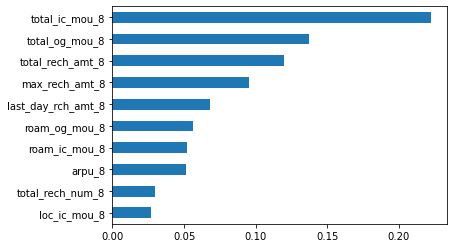

In [89]:
# list of important features
X = df
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

# Observation from Random Forest

#### Local Incoming for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are the important predictor variables to predict churn.

# Overall Observations

### Below are the features which are important to predict churn
1. Std Outgoing Calls and Revenue Per Customer indicades Churn more effectively.
2. Local Incoming and Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.
3. cutomers with tenure less than 4 yrs are more likely to churn.
4. Max Recharge Amount is a strong feature to predict churn.